In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import itertools
from sympy import Matrix, tanh, exp
from sympy.abc import x, y
from sympy import symbols
#from utils import newtons_method
from smt.sampling_methods import LHS
import random
import math

In [3]:
#parameters


N = 3 #number of neurons
h = np.random.normal(1, 1, size=(N, 1)) #internal states of the neurons (i.e., firing activity of neurons)

#W, weight connectivity matrix (sampled from N(u, 1/N))
W = np.random.normal(0, 1/N, size=(N, N))

#vectorize sigmoid non-linearity
alpha = 0.01
sigmoid = lambda x: 1/ (1 + np.exp(-alpha * x))
sigmoid_func = np.vectorize(sigmoid)

#J, connectivity matrix
J = np.random.normal(0, 1/N, size=(N, N))

#vectorize tanh nonlinearity
gain = 2
tanh = lambda x: np.tanh(gain*x)
tanh_func = np.vectorize(tanh)





c:\users\nand chandravadia\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


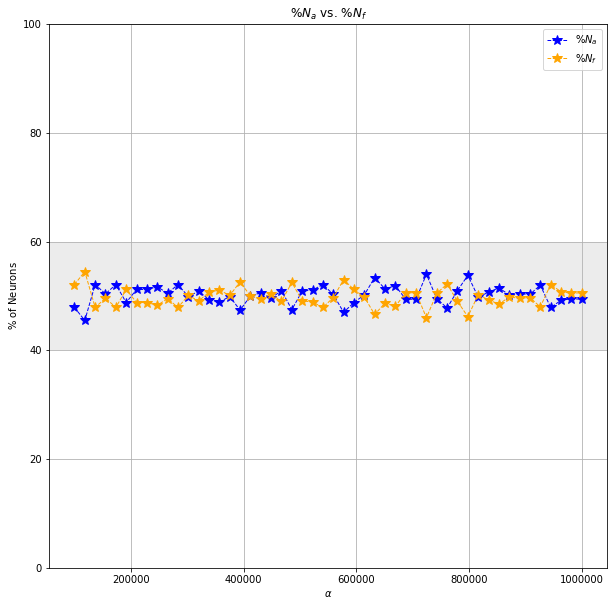

In [121]:
#Plot 

fig, axes = plt.subplots(1, 1, figsize = (10, 10)) 

alpha_values = np.linspace(start = 10**5, stop = 10 **6, num=50)
active = []
frozen = []

for a in alpha_values: 
    
    N = 100
    W = np.random.normal(0, 1/N, size=(N, N))
    h = np.random.normal(1, 1, size=(N, 1))
    
    sigmoid = lambda x: 1/ (1 + np.exp(-a * x))
    sigmoid_func = np.vectorize(sigmoid)


    sigma = sigmoid_func(W @ h)
    Na = len(np.where(sigma >= 1)[0])
    Nf = N - Na
    
    active.append(100*(Na/N))
    frozen.append(100*(Nf/N))
    
    
    
    
axes.plot(alpha_values, active, color = 'blue', marker = '*', linestyle='dashed', linewidth=1, markersize=10, label = r'$\%N_a$')
axes.plot(alpha_values, frozen, color = 'orange', marker = '*',linestyle='dashed',  linewidth=1, markersize=10, label = r'$\%N_f$')
axes.axhspan(ymin=40, ymax=60, facecolor='grey', alpha = 0.15)

axes.set_xlabel(r'$\alpha$')
axes.set_ylabel(r'$\%$ of Neurons')
axes.set_title(r'$\%N_a$' + " vs. " r'$\%N_f$')

axes.set_ylim(0, 100)
axes.grid(True)
axes.legend()

#fig.savefig('./figs/percentOfNeurons_vs_alpha.png',format='png')


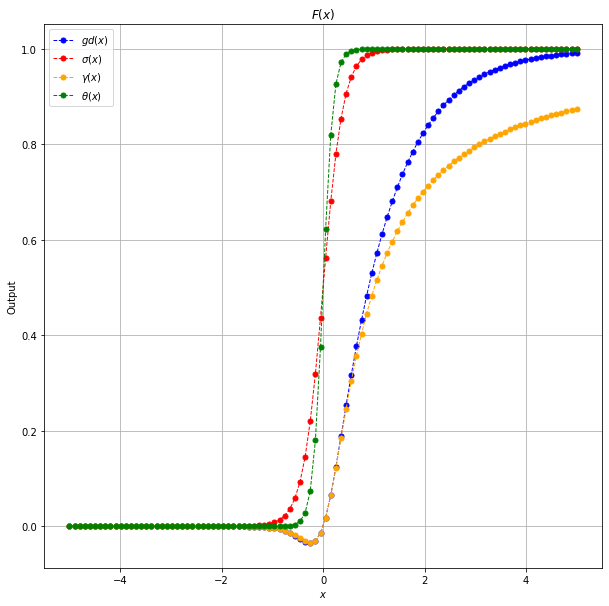

In [168]:
#plot sigmoid fxn vs. gudermannian fxn. vs. artangent fxn. 


#Plot 

fig, axes = plt.subplots(1, 1, figsize = (10, 10)) 

x_values = np.linspace(start = -5, stop = 5, num=100)
gudermannian = lambda x: (4/math.pi)*math.atan(np.tanh(x/2))/(1 + np.exp(-alpha * x))
sigmoid = lambda x: 1/ (1 + np.exp(-alpha * x))
arctangent = lambda x: (2/math.pi)*math.atan(x)/(1 + np.exp(-alpha*x))
heavyside = lambda x: 1/ (1 + np.exp(-2*alpha * x))

g = []
s = []
a = []
h = []




for x in x_values: 
    
    g.append(gudermannian(x))
    s.append(sigmoid(x))
    a.append(arctangent(x))
    h.append(heavyside(x))
    
        
    
axes.plot(x_values, g, color = 'blue', marker = '.', linestyle='dashed', linewidth=1, markersize=10, label = r'$gd(x)$')
axes.plot(x_values, s, color = 'red', marker = '.',linestyle='dashed',  linewidth=1, markersize=10, label = r'$\sigma(x)$')
axes.plot(x_values, a, color = 'orange', marker = '.',linestyle='dashed',  linewidth=1, markersize=10, label = r'$\gamma(x)$')
axes.plot(x_values, h, color = 'green', marker = '.',linestyle='dashed',  linewidth=1, markersize=10, label = r'$\theta(x)$')

axes.set_xlabel(r'$x$')
axes.set_ylabel('Output')
axes.set_title(r'$F(x)$')


axes.grid(True)
axes.legend()

#fig.savefig('./figs/F(x).png',format='png')




In [209]:
#plot derivative of sigmoid fxn vs. gudermannian fxn. vs. artangent fxn. 


#let's define our symbols
from sympy import tanh, atan, exp, pi, HadamardProduct, diff

J11, J12, J13 =  symbols("J11"), symbols("J12"), symbols("J13")
J21, J22, J23 = symbols("J21"), symbols("J22"), symbols("J23")
J31, J32, J33 = symbols("J31"), symbols("J32"), symbols("J33")

W11, W12, W13 =  symbols("W11"), symbols("W12"), symbols("W13")
W21, W22, W23 = symbols("W21"), symbols("W22"), symbols("W23")
W31, W32, W33 = symbols("W31"), symbols("W32"), symbols("W33")

a, g, h = symbols("a"), symbols("g"), symbols("h")
h1, h2, h3 = symbols("h1"), symbols("h2"), symbols("h3")

In [210]:
sigmoid = 1/ (1 + exp(-a * h))
gudermannian = (4/pi)*atan(tanh(h/2))/(1 + exp(-a * h))
arctangent = (2/pi)*atan(h)/(1 + exp(-a*h))
heavyside = 1/ (1 + exp(-2*a * h))

diff_sigmoid = diff(sigmoid,h)
diff_gudermannian = diff(gudermannian,h)
diff_arctangent = diff(arctangent,h)
diff_heavyside = diff(heavyside,h)





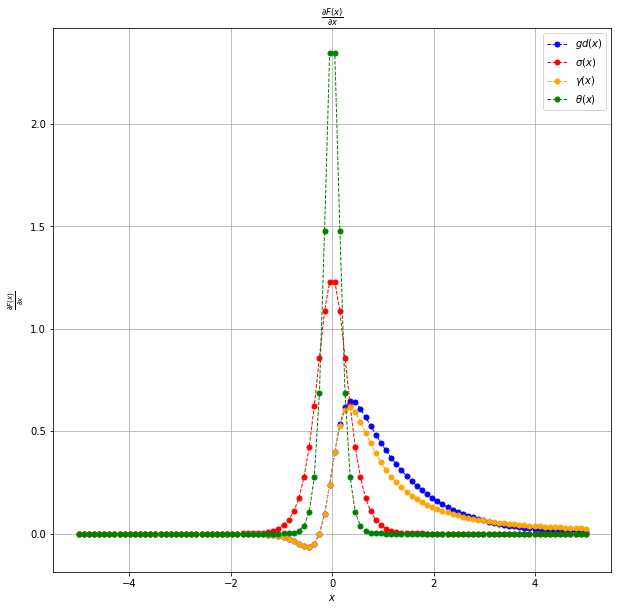

In [215]:
#Plot 

fig, axes = plt.subplots(1, 1, figsize = (10, 10)) 

x_values = np.linspace(start = -5, stop = 5, num=100)


g = []
s = []
arc = []
heavy = []




for x in x_values: 
    
    s.append(float(diff_sigmoid.subs([(a, 5), (h, x)])))
    g.append(float(diff_gudermannian.subs([(a, 5), (h, x)])))
    arc.append(float(diff_arctangent.subs([(a, 5), (h, x)])))
    heavy.append(float(diff_heavyside.subs([(a, 5), (h, x)])))
        
    
axes.plot(x_values, g, color = 'blue', marker = '.', linestyle='dashed', linewidth=1, markersize=10, label = r'$gd(x)$')
axes.plot(x_values, s, color = 'red', marker = '.',linestyle='dashed',  linewidth=1, markersize=10, label = r'$\sigma(x)$')
axes.plot(x_values, arc, color = 'orange', marker = '.',linestyle='dashed',  linewidth=1, markersize=10, label = r'$\gamma(x)$')
axes.plot(x_values, heavy, color = 'green', marker = '.',linestyle='dashed',  linewidth=1, markersize=10, label = r'$\theta(x)$')

axes.set_xlabel(r'$x$')
axes.set_ylabel(r'$\frac{\partial F(x)}{\partial x}$')
axes.set_title(r'$\frac{\partial F(x)}{\partial x}$')


axes.grid(True)
axes.legend()

fig.savefig('./figs/dF(x).png',format='png')